<a href="https://colab.research.google.com/github/mnassar/linkedin-queens-game/blob/main/Linkedin_Queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve Linkedin Colored Queens Game

## @author: mohamad nassar

## Nov 2024

#### game website: https://www.linkedin.com/games/queens/

In [1]:
# !curl -L  https://drive.google.com/uc?id=1iS8oeZvFlu8WcyiyVOSb_vvBOP7FFS0x  --output queens198.png
!curl -L https://drive.google.com/uc?id=1icgJVECK3E4BTY6T7wTdEMPbBP_RrmgJ --output queens199.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  135k  100  135k    0     0  50308      0  0:00:02  0:00:02 --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 53379  100 53379    0     0  16717      0  0:00:03  0:00:03 --:--:-- 31566


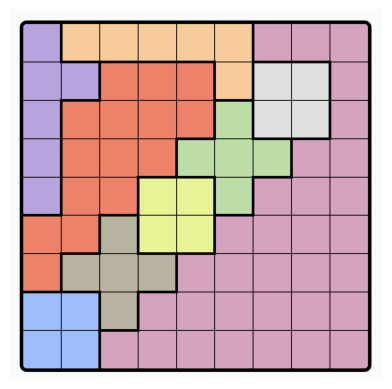

In [3]:
import cv2
from matplotlib import pyplot as plt
# img_color = cv2.imread('queens198.png')
img_color = cv2.imread('queens199.png')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.axis("off")
plt.show()

In [4]:
print(img_color.shape)

(838, 844, 3)


In [8]:
# extract visually :-) (or replace with a CNN)
# nb_squares_hor = 8
# nb_squares_ver = 8
nb_squares_hor = 9
nb_squares_ver = 9

board = [['x' for j in range(nb_squares_hor)] for i in range(nb_squares_ver)]

In [13]:
# adjust for your img
shift_v = 75
shift_h = 40
# stride = 77
stride = 90

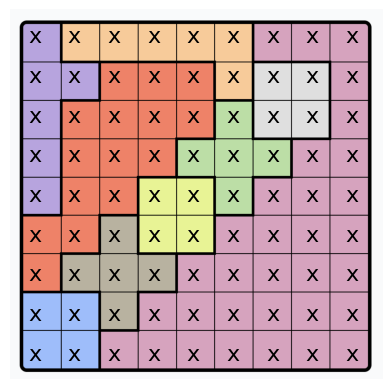

In [14]:
def draw(board, with_x = False):
  plt.imshow(img_color)
  plt.axis("off")

  for r in range(nb_squares_ver):
    for c in range(nb_squares_hor):
      if with_x or (not with_x and board[r][c] == 'Q'):
        plt.text(shift_h + c * stride, shift_v + r * stride, board[r][c], color="black",  fontsize=16) #weight="bold",
  plt.show()

draw(board, True)

In [15]:
# boilerplate func to extract color name from r,g,b

import webcolors
def closest_color(requested_color):
  min_colors = {}
  for name in webcolors.names("css3"):
      r_c, g_c, b_c = webcolors.name_to_rgb(name)
      rd = (r_c - requested_color[0]) ** 2
      gd = (g_c - requested_color[1]) ** 2
      bd = (b_c - requested_color[2]) ** 2
      min_colors[(rd + gd + bd)] = name
  return min_colors[min(min_colors.keys())]

['lightsteelblue', 'navajowhite', 'navajowhite', 'navajowhite', 'navajowhite', 'navajowhite', 'plum', 'plum', 'plum']
['lightsteelblue', 'lightsteelblue', 'salmon', 'salmon', 'salmon', 'navajowhite', 'gainsboro', 'gainsboro', 'plum']
['lightsteelblue', 'salmon', 'salmon', 'salmon', 'salmon', 'silver', 'gainsboro', 'gainsboro', 'plum']
['lightsteelblue', 'salmon', 'salmon', 'salmon', 'silver', 'silver', 'silver', 'plum', 'plum']
['lightsteelblue', 'salmon', 'salmon', 'khaki', 'khaki', 'silver', 'plum', 'plum', 'plum']
['salmon', 'salmon', 'darkgrey', 'khaki', 'khaki', 'plum', 'plum', 'plum', 'plum']
['salmon', 'darkgrey', 'darkgrey', 'darkgrey', 'plum', 'plum', 'plum', 'plum', 'plum']
['lightskyblue', 'lightskyblue', 'darkgrey', 'plum', 'plum', 'plum', 'plum', 'plum', 'plum']
['lightskyblue', 'lightskyblue', 'plum', 'plum', 'plum', 'plum', 'plum', 'plum', 'plum']


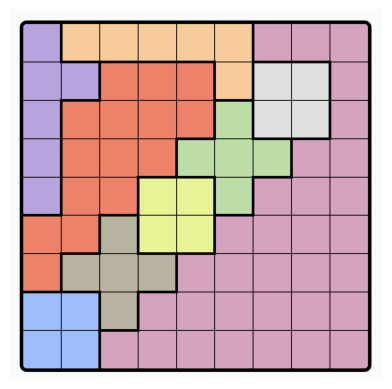

In [16]:
# extract img_str
img_list = []

for r in range(nb_squares_ver):
  img_row = []
  for c in range(nb_squares_hor):
    color = closest_color(img_color[shift_v + r * stride][shift_h + c * stride])
    img_row.append(color)
  img_list.append(img_row)

for r in (img_list):
  print(r)
# verify img_str is correct
plt.imshow(img_color)
plt.axis("off")
plt.show()


In [17]:
# construct domain for each color
from collections import defaultdict

color_squares = defaultdict(list)
for r in range(len(img_list)):
  for c in range(len(img_list[0])):
    color_squares[img_list[r][c]].append((r,c))


In [18]:
color_squares

defaultdict(list,
            {'lightsteelblue': [(0, 0),
              (1, 0),
              (1, 1),
              (2, 0),
              (3, 0),
              (4, 0)],
             'navajowhite': [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5)],
             'plum': [(0, 6),
              (0, 7),
              (0, 8),
              (1, 8),
              (2, 8),
              (3, 7),
              (3, 8),
              (4, 6),
              (4, 7),
              (4, 8),
              (5, 5),
              (5, 6),
              (5, 7),
              (5, 8),
              (6, 4),
              (6, 5),
              (6, 6),
              (6, 7),
              (6, 8),
              (7, 3),
              (7, 4),
              (7, 5),
              (7, 6),
              (7, 7),
              (7, 8),
              (8, 2),
              (8, 3),
              (8, 4),
              (8, 5),
              (8, 6),
              (8, 7),
              (8, 8)],
             'salmon': [(1, 2),
        

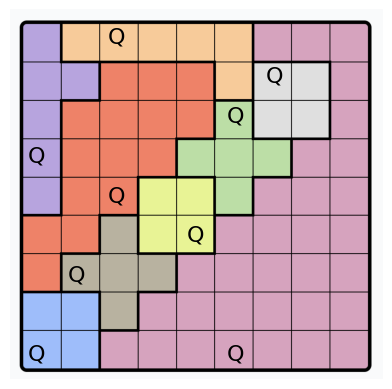

In [19]:
import random
board = [['x' for j in range(nb_squares_hor)] for i in range(nb_squares_ver)]

queens = {}
# place a queen in each row
for color in color_squares:
  (r,c) = random.choice (color_squares[color])
  queens[color] = (r,c)
  board[r][c] = 'Q'

draw(board)

In [20]:
queens

{'lightsteelblue': (3, 0),
 'navajowhite': (0, 2),
 'plum': (8, 5),
 'salmon': (4, 2),
 'gainsboro': (1, 6),
 'silver': (2, 5),
 'khaki': (5, 4),
 'darkgrey': (6, 1),
 'lightskyblue': (8, 0)}

Solved! after  900635 iterations


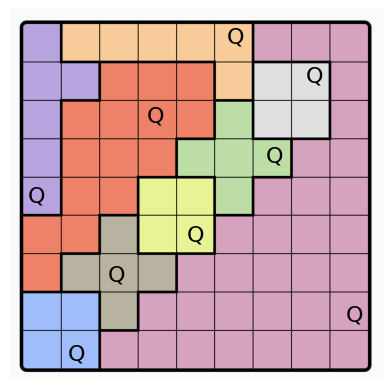

In [21]:
#local search
it = 0
while True:
  it +=1
  # count constraints per queen
  constraints = {}
  for q1 in queens:
    constraints[q1] = 0
    r1,c1 = queens[q1]
    for q2 in queens:
      if q1 != q2:
        r2, c2 = queens[q2]
        # are they adjacent? (i.e. norm inf. distance <= 1 )
        if max ( abs (r1 - r2), abs (c1 - c2)) == 1:
          constraints[q1] += 1
        elif r1 == r2 or c1 == c2:
          constraints[q1] += 1

  # print("before: ")
  # draw(board)

  # select a queen with a positive number of constraints
  candidates = [ color for color in constraints if constraints[color] > 0 ]
  if len (candidates) == 0:
    print ("Solved! after ", it, "iterations")
    draw(board)
    break

  move = random.choice( candidates )
  # print ("it", it, ": ", move, queens[move], constraints[move])

  # print("after: ")
  #update board
  board[queens[move][0]][queens[move][1]] = 'x'
  # change position among same color squares
  queens[move] = random.choice(color_squares[move])
  board[queens[move][0]][queens[move][1]] = 'Q'
  # draw(board)


In [ ]:
# bruteforce 198
bruteforce = 3 * 4 * 5 * 9 * 4 * 6 * 10 * 23
bruteforce

2980800

In [22]:
# bruteforce 199
4 * 5 * 4 * 5 * 4 * 6 * 16 * 6 * 32

29491200

In [23]:
900635 / 29491200

0.030539109971788193